In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import math

In [2]:
# 3

In [3]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # creates a meshgrid of values from min to max with 0.02 evenly spaced points
    # creates 2 2D arrays of each y and x values
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # .ravel makes the array one continous array 
    # clf.predict predicts the testing data in regards to the training data 
    Z = Z.reshape(xx.shape)
    # reshapes the data into 2D shape 
        # .reshape(-1, 1) 
    out = plt.contourf(xx, yy, Z, **params)
    return out

def draw_contour(x,y,clf, class_labels = ["Negative", "Positive"]):
    """
    Draws a contour line for the predictor
    
    Assumption that x has only two features. This functions only plots the first two columns of x.
    
    """
    
    X0, X1 = x[:, 0], x[:, 1]
    xx0, xx1 = make_meshgrid(X0,X1)
    
    plt.figure(figsize = (10,6))
    plot_contours(clf, xx0, xx1, cmap="PiYG", alpha=0.8)
    scatter=plt.scatter(X0, X1, c=y, cmap="PiYG", s=30, edgecolors="k")
    plt.legend(handles=scatter.legend_elements()[0], labels=class_labels)

    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())


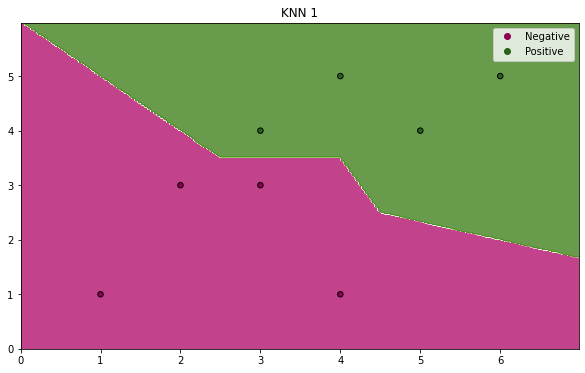

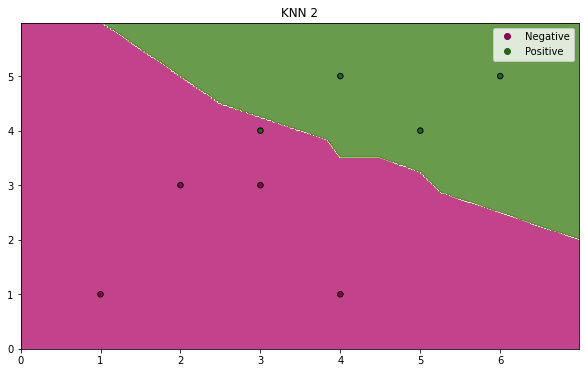

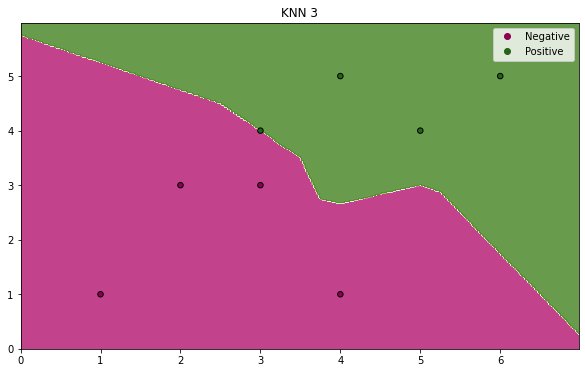

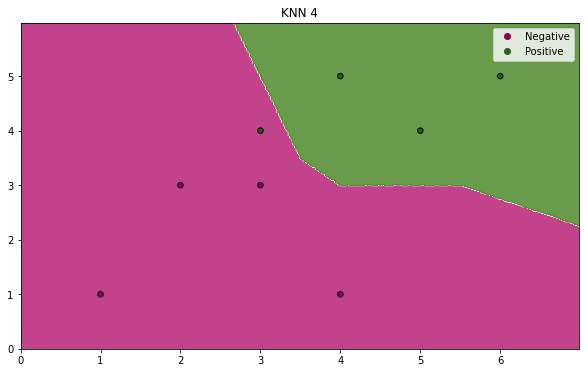

In [5]:
# Your code here - use draw_contour() for showing the Voronoi regions, the other functions are called inside it.
x = np.array([[1,1], [4,1], [2,3], [3,3], [3,4], [5,4], [6,5], [4,5]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
for i in range(1, 5):
    kclf = KNeighborsClassifier(n_neighbors=i).fit(x, y)
    draw_contour(x, y, kclf)
    plt.title("KNN " + str(i))
    plt.show()


What I find curious about the plots is that with odd neighbors, the model is very accurate but with even neighbors, it has a mislabelled point. The reason is because since we are using an even number of neighbors, there are chances of having an equal majority rule. When this happens, the program can just choose randomly which point it would be. With KNN = 1, the model fits very well, but it could because of overfitting in which the model is only using 1 point closest to it in order to label themselves as 0 or 1. The biggest weakness with this is that if there was an outlier, then the point would be mislabelled and wrong. Because of this, I like KNN = 3 as the model is still accurate and it includes more point in order to classify the points. KNN = 2 and KNN = 4 are also fairly accurate with one point mislabelled, but since it uses an even number of neighbors, if it has an equal amount of Class A and Class B in it, it can produce inaccurate results which is why I prefer KNN = 3.

In [6]:
#4


In [7]:
def logistic(b0, b1, x):
    values = []
    for i in x:
        values.append(1 / (1 + math.exp(-(b0 + b1*i))))
    return values

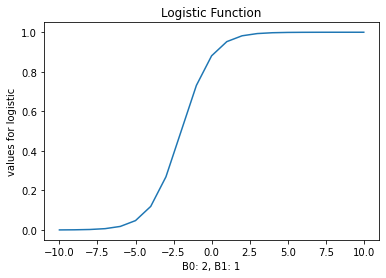

In [8]:
plt.plot(range(-10, 11), logistic(2, 1, range(-10, 11)))
plt.title("Logistic Function")
plt.xlabel("B0: 2, B1: 1")
plt.ylabel("values for logistic")
plt.show()

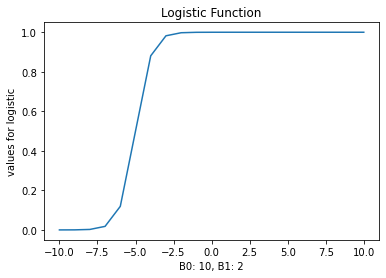

In [9]:
plt.plot(range(-10, 11), logistic(10, 2, range(-10, 11)))
plt.title("Logistic Function")
plt.xlabel("B0: 10, B1: 2")
plt.ylabel("values for logistic")
plt.show()

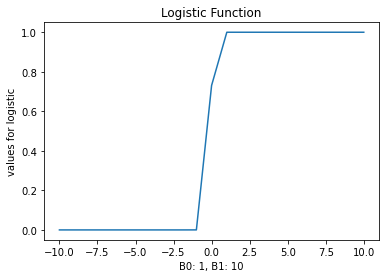

In [10]:
plt.plot(range(-10, 11), logistic(1, 10, range(-10, 11)))
plt.title("Logistic Function")
plt.xlabel("B0: 1, B1: 10")
plt.ylabel("values for logistic")
plt.show()

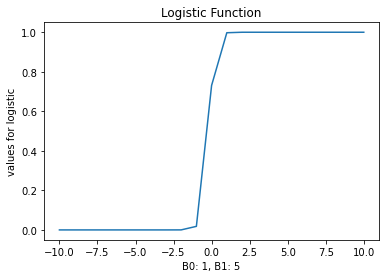

In [11]:
plt.plot(range(-10, 11), logistic(1, 5, range(-10, 11)))
plt.title("Logistic Function")
plt.xlabel("B0: 1, B1: 5")
plt.ylabel("values for logistic")
plt.show()

For larger values of $B_{1}$, the function becomes steeper, and the choices where $B_{1}$ is 5 or greater made the function steeper and $B_{0}$ only shifts the graph.